In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/60k-responses-of-16-personalities-test-mbt/16P.csv
/kaggle/input/60k-responses-of-16-personalities-test-mbt/16p-Mapping.txt


In [2]:
data = pd.read_csv('/kaggle/input/60k-responses-of-16-personalities-test-mbt/16P.csv', encoding='shift_jis') 

In [3]:
data

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [4]:
ex = data.drop(['Personality'],axis=1)
ta = data['Personality']
print(ex.head)
print(ta.head)

<bound method NDFrame.head of        Response Id  You regularly make new friends.  \
0                0                                0   
1                1                                0   
2                2                                0   
3                3                                0   
4                4                                0   
...            ...                              ...   
59994        59994                                0   
59995        59995                                0   
59996        59996                                0   
59997        59997                                0   
59998        59998                                0   

       You spend a lot of your free time exploring various random topics that pique your interest  \
0                                                      0                                            
1                                                      0                                            
2     

In [5]:
ex.dtypes

Response Id                                                                                   int64
You regularly make new friends.                                                               int64
You spend a lot of your free time exploring various random topics that pique your interest    int64
Seeing other people cry can easily make you feel like you want to cry too                     int64
You often make a backup plan for a backup plan.                                               int64
                                                                                              ...  
You complete things methodically without skipping over any steps.                             int64
You are very intrigued by things labeled as controversial.                                    int64
You would pass along a good opportunity if you thought someone else needed it more.           int64
You struggle with deadlines.                                                                  int64


In [6]:
ex.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You complete things methodically without skipping over any steps.                             0
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work

In [7]:
ex.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

ta = label_encoder.fit_transform(ta)

print(ta)

[ 1 13  8 ... 15 14  8]


In [9]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(ex, ta,test_size=0.2,random_state=0)

In [11]:
no_of_minority_classes_to_get = int(np.round(len(np.unique(y_train)) * 0.25))
percentage_to_remove = 80
for class_to_remove in range(no_of_minority_classes_to_get):
    indices_to_remove = np.unique(np.where(y_train == class_to_remove)[0])
    # Calculate the number of samples to remove
    num_samples_to_remove = int(percentage_to_remove / 100 * len(indices_to_remove))

    # Randomly select indices to remove
    indices_to_remove = np.random.choice(indices_to_remove, num_samples_to_remove, replace=False)
    # Remove the selected samples
    percentage_to_remove -= 10

    # Remove the selected samples
    X_train = np.delete(X_train, indices_to_remove, axis=0)
    y_train = np.delete(y_train, indices_to_remove, axis=0)
    percentage_to_remove -= 10

In [12]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 602, 1188, 1817, 2416, 3054, 3001, 2999, 3000, 3041, 3017, 3016,
        2959, 2980, 2942, 2975, 2989]))

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(objective='multi:softmax', num_class=16)

param_grid = {"max_depth": [5], 
              "learning_rate": [0.1], 
              "min_child_weight": [2],
              "subsample": [0.8],
              "gamma": [0],
              "colsample_bytree": [0.5],
              "colsample_bylevel": [0.8],
              "n_estimators": [200]
             }

grid_result = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy', 
                           cv=3,
                           verbose=1,
                           return_train_score=True,
                           n_jobs=-1)

grid_result.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=16,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.8], 'colsample_bytree': [0.5],
                         'gamma': [0], 'learning_rate': [0.1], 'max_depth': [5],
                         'min_child_weight': [2], 'n_estimators': [200],
                         'subsample': [0.8]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [14]:
import pprint
pprint.pprint(grid_result.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=16,
              num_parallel_tree=None, ...)


In [15]:
grid_result = grid_result.best_estimator_

In [13]:
#import xgboost as xgb

#model.save_model('model.json', format='json')

In [16]:
import shap
explainer = shap.TreeExplainer(grid_result)

[12:50:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [17]:
shap_values = explainer.shap_values(X_train)

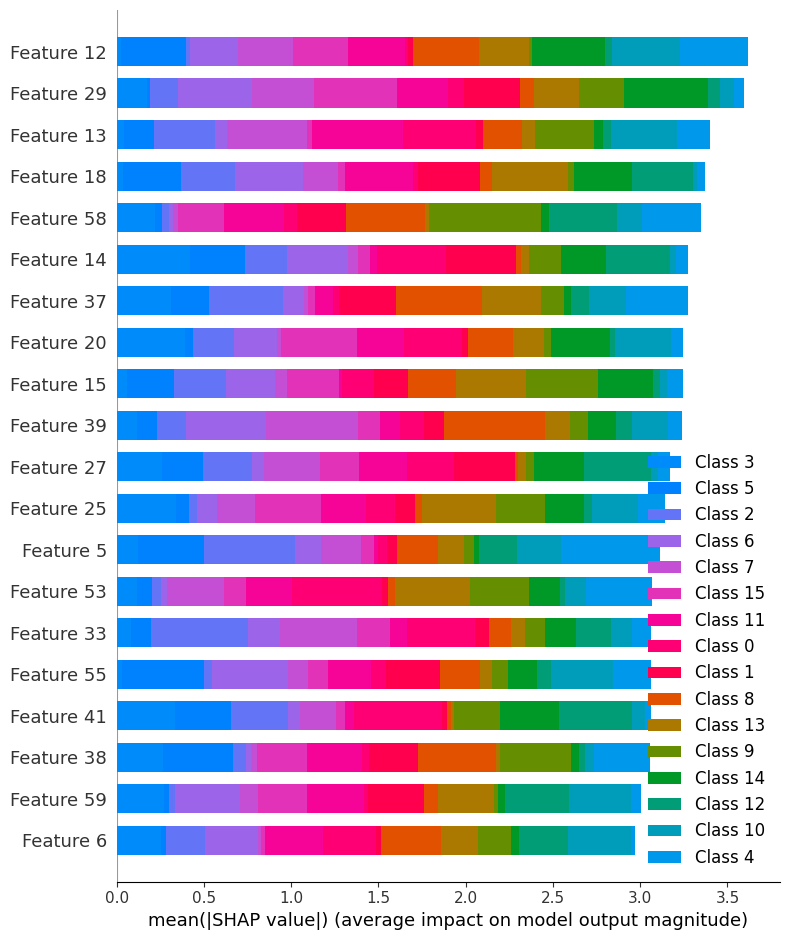

In [18]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = grid_result.predict(x_test) 
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)

precision = precision_score(y_true, y_pred, average='weighted')

recall = recall_score(y_true, y_pred, average='weighted')

f1 = f1_score(y_true, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9644166666666667
Precision: 0.9648073129863262
Recall: 0.9644166666666667
F1 Score: 0.9643255278483387
Confusion Matrix:
[[645   5   2   6  12   3   0   7   2  11  12   8  10   3   1   7]
 [  1 758   1   3   1   2   3   0   1   3   7   3   4   2   0   1]
 [  0   0 681   1   3   2   0   4   3   6   1   1   1   2   3   2]
 [  0   0   1 719   0   2   4   2   2   2   0   1   1   4   2   0]
 [  0   0   0   0 675   2   0   1   2   1   7   2   0   1   0   1]
 [  0   0   2   0   1 750   0   1   1   0   2   3   4   1   1   2]
 [  0   3   0   1   3   1 739   1   1   2   1   5   1   2   0   0]
 [  0   1   3   0   4   4   0 731   0   2   0   0   1   0   1   2]
 [  0   1   3   5   3   2   2   1 691   2   1   3   0   3   1   2]
 [  1   0   2   0   5   1   3   2   0 696   0   2   2   1   0   2]
 [  0   0   0   2   0   1   1   1   0   2 705   4   4   2   4   1]
 [  2   3   1   1   6   2   0   0   1   0   2 759   2   1   2   1]
 [  0   0   0   0   0   2   6   1   0   2   4   2 735   1   1  

In [24]:
f1_all_cls = f1_score(y_true, y_pred, average=None)
for i, f1 in enumerate(f1_all_cls):
    print("class {} : {:.3f}".format(i, f1), end=", ")

class 0 : 0.933, class 1 : 0.971, class 2 : 0.966, class 3 : 0.970, class 4 : 0.958, class 5 : 0.973, class 6 : 0.972, class 7 : 0.973, class 8 : 0.967, class 9 : 0.959, class 10 : 0.957, class 11 : 0.960, class 12 : 0.961, class 13 : 0.973, class 14 : 0.969, class 15 : 0.965, 

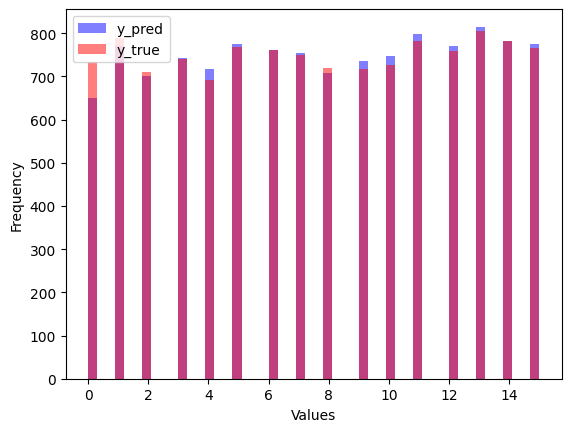

In [23]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=50, color='blue', alpha=0.5, label='y_pred')
plt.hist(y_true, bins=50, color='red', alpha=0.5, label='y_true')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()